In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

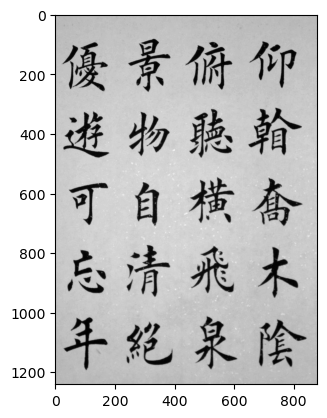

In [19]:
img = cv2.imread('./test_imgs/shufa.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

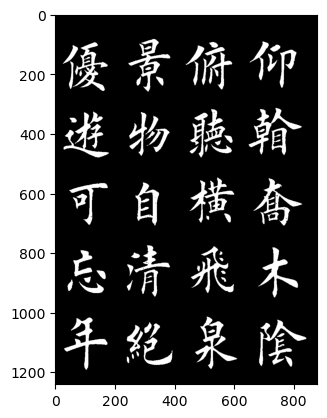

In [20]:
# 作用：将画面像素与比较阈值对比，小于它则设为0（黑色），大于它设为目标值
r, black_img = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(black_img, cmap='gray')

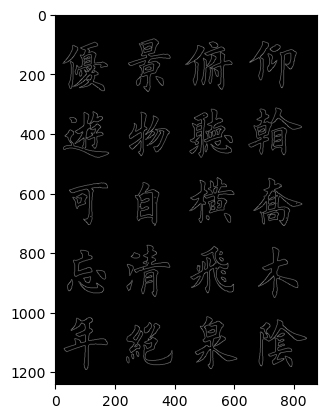

In [21]:
# 边缘检测
edges = cv2.Canny(black_img, 30, 200)
plt.imshow(edges, cmap='gray')

In [22]:
# 找轮廓
coutours, h = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


In [23]:
img_copy = img.copy()
for c in coutours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),3)


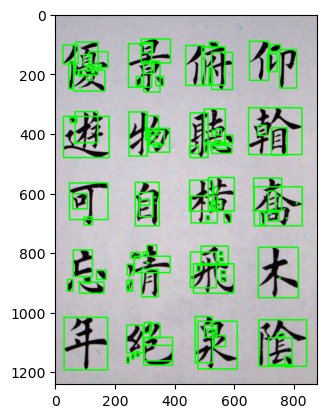

In [24]:
plt.imshow(img_copy)

In [25]:
# 先侵蚀，去除噪点
kernel = np.ones((3,3),dtype=np.int8)
erosion1=cv2.erode(black_img,kernel,iterations=1)

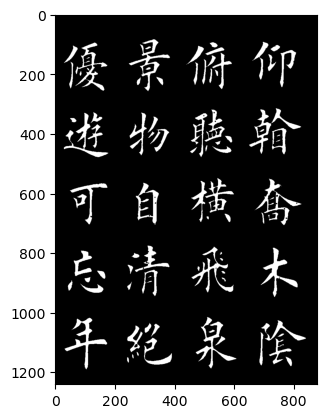

In [26]:
plt.imshow(erosion1,cmap='gray')

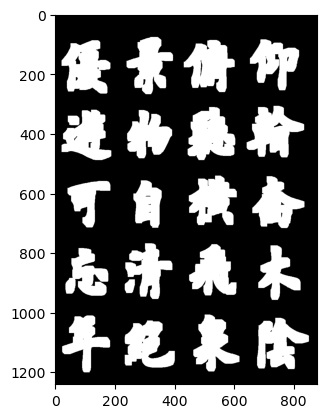

In [27]:
# 再膨胀
kernel = np.ones((10,10),dtype=np.int8)
dilation = cv2.dilate(erosion1,kernel,iterations=2)
plt.imshow(dilation,cmap='gray')

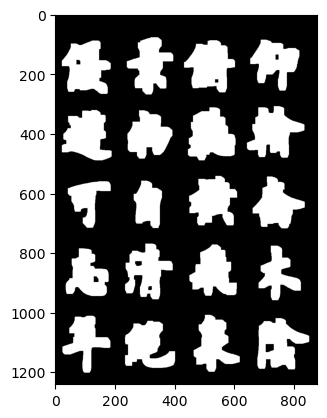

In [28]:
# 闭合
kernel = np.ones((10,10),dtype=np.int8)
closing = cv2.morphologyEx(dilation,cv2.MORPH_CLOSE,kernel)
plt.imshow(closing,cmap='gray')

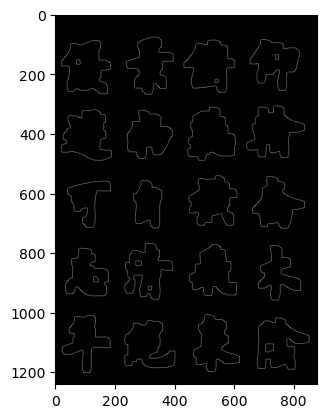

In [29]:
# 边缘检测
edges1 = cv2.Canny(closing,30,200)
plt.imshow(edges1,cmap='gray')

In [33]:
# 找轮廓
coutours, h = cv2.findContours(edges1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [34]:
img_copy = img.copy()
for c in coutours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),3)

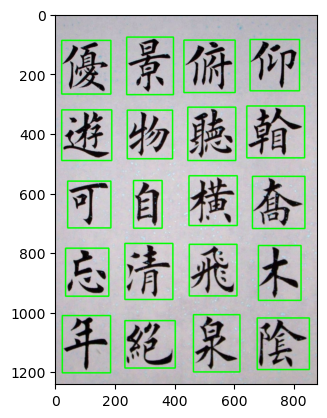

In [35]:
plt.imshow(img_copy)